In [1]:
install.packages("caret")
install.packages("ISLR")
install.packages("gam")
library(caret)
library(ISLR)
library(gam)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Loading required package: lattice

Loading required package: splines

Loading required package: foreach

Loaded gam 1.22-2




In [2]:
## data
set.seed(1234)
x = round(runif(500, -3, 3), 3)
e = round(rnorm(500, 0, 2), 3)
y = 0.3 - 2 * x - 0.1 * x^2 + x^3 + e
data = data.frame(x, y)

In [3]:
## test data
test_x = round(runif(200, -3, 3), 3)
test_e = round(rnorm(200, 0, 2), 3)
test_y = 0.3 - 2 * test_x - 0.1 * test_x^2 + test_x^3 + test_e
test = data.frame(x = test_x, y = test_y)

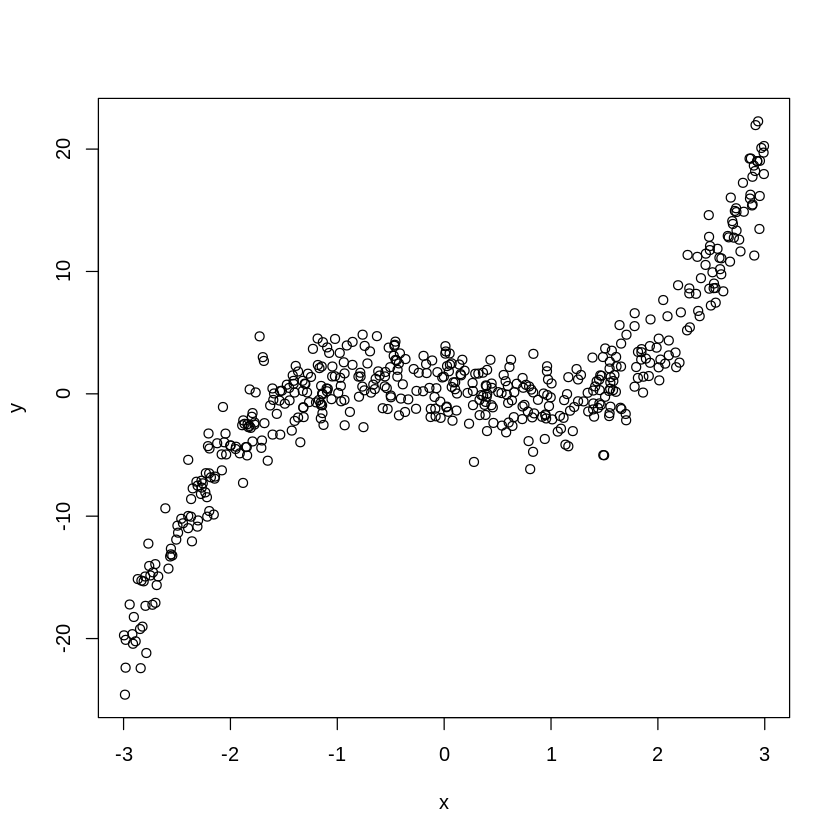

In [4]:
## x, y plot
plot(x, y)

In [5]:
## index로 분할 & split training, validation data
ind_train = createDataPartition(y = data$y, p = 0.75, list = FALSE)
training = data[ind_train, ]   # training data
val = data[-ind_train, ]       # validation data

nrow(training)
nrow(val)

[1] 376

[1] 124

In [6]:
## 다항회귀 ##
fit1 = lm(y ~ poly(x, 3, raw = T), data = training)
summary(fit1)


Call:
lm(formula = y ~ poly(x, 3, raw = T), data = training)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5860 -1.3943  0.0347  1.1350  6.5215 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.48180    0.14907   3.232  0.00134 ** 
poly(x, 3, raw = T)1 -1.87897    0.14455 -12.998  < 2e-16 ***
poly(x, 3, raw = T)2 -0.17233    0.03761  -4.582  6.3e-06 ***
poly(x, 3, raw = T)3  0.97797    0.02436  40.139  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.965 on 372 degrees of freedom
Multiple R-squared:  0.9295,	Adjusted R-squared:  0.929 
F-statistic:  1635 on 3 and 372 DF,  p-value: < 2.2e-16


In [7]:
fit2 = lm(y ~ x + I(x^2) + I(x^3), data = training)
summary(fit2)


Call:
lm(formula = y ~ x + I(x^2) + I(x^3), data = training)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5860 -1.3943  0.0347  1.1350  6.5215 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.48180    0.14907   3.232  0.00134 ** 
x           -1.87897    0.14455 -12.998  < 2e-16 ***
I(x^2)      -0.17233    0.03761  -4.582  6.3e-06 ***
I(x^3)       0.97797    0.02436  40.139  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.965 on 372 degrees of freedom
Multiple R-squared:  0.9295,	Adjusted R-squared:  0.929 
F-statistic:  1635 on 3 and 372 DF,  p-value: < 2.2e-16


In [8]:
## 표준화기저함수 ##
fit3 = lm(y ~ scale(x), data = training)
summary(fit3)


Call:
lm(formula = y ~ scale(x), data = training)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.5301  -3.2740   0.2186   3.3301  12.1484 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.1168     0.2337    0.50    0.617    
scale(x)      5.8175     0.2341   24.86   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.532 on 374 degrees of freedom
Multiple R-squared:  0.6229,	Adjusted R-squared:  0.6219 
F-statistic: 617.8 on 1 and 374 DF,  p-value: < 2.2e-16


In [9]:
## 일반화 가법 모형 ##
gam.m3 = gam(wage ~ s(year, 4) + s(age, 5) + education, data = Wage)
gam1 = gam(y ~ s(x, 4), data = training)
summary(gam1)


Call: gam(formula = y ~ s(x, 4), data = training)
Deviance Residuals:
      Min        1Q    Median        3Q       Max 
-6.883732 -1.458105 -0.006643  1.353998  7.555777 

(Dispersion Parameter for gaussian family taken to be 4.7848)

    Null Deviance: 20374.58 on 375 degrees of freedom
Residual Deviance: 1775.154 on 370.9999 degrees of freedom
AIC: 1662.614 

Number of Local Scoring Iterations: NA 

Anova for Parametric Effects
           Df  Sum Sq Mean Sq F value    Pr(>F)    
s(x, 4)     1 12691.4 12691.4  2652.5 < 2.2e-16 ***
Residuals 371  1775.2     4.8                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Anova for Nonparametric Effects
            Npar Df Npar F     Pr(F)    
(Intercept)                             
s(x, 4)           3 411.57 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [10]:
gam2 = lm(y ~ ns(x, 3), data = training)
summary(gam2)


Call:
lm(formula = y ~ ns(x, 3), data = training)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8673 -1.4810  0.1116  1.3637  7.1884 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -18.8094     0.3960 -47.493  < 2e-16 ***
ns(x, 3)1     1.7062     0.4602   3.707 0.000241 ***
ns(x, 3)2    51.3084     0.9749  52.630  < 2e-16 ***
ns(x, 3)3    19.7363     0.3868  51.022  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.149 on 372 degrees of freedom
Multiple R-squared:  0.9157,	Adjusted R-squared:  0.915 
F-statistic:  1346 on 3 and 372 DF,  p-value: < 2.2e-16


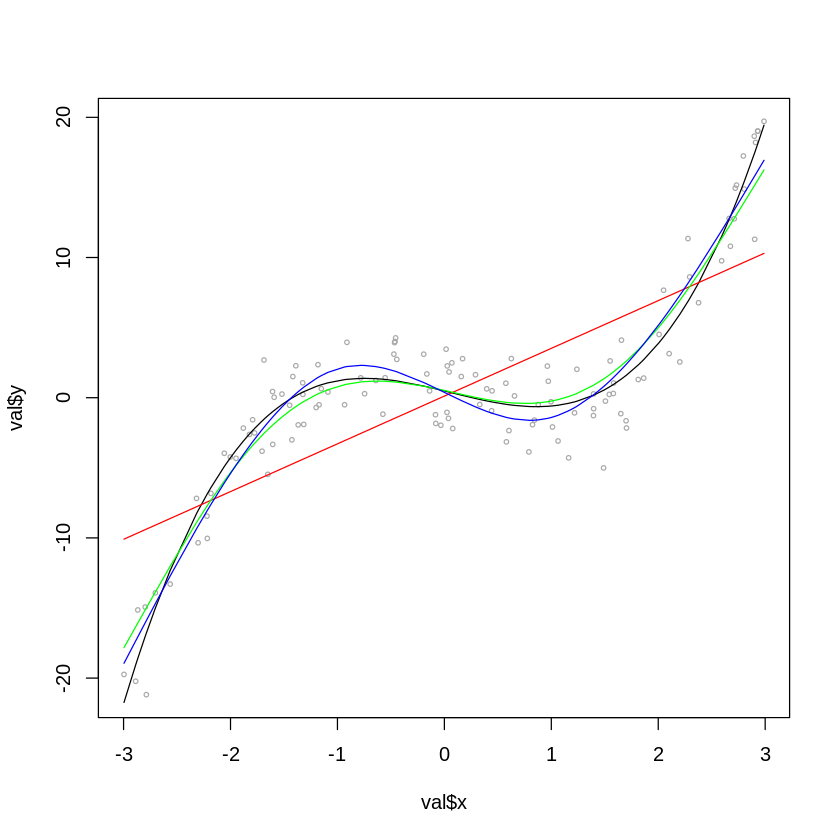

In [11]:
## prediction
## 다항회귀 ##
pred1 = predict(fit1, newdata = val, se = T)
plot(val$x, val$y, cex = 0.5, col = "darkgrey")
list1 = data.frame(x = val$x, y = pred1$fit)
list1 = list1[order(list1$x), ]
lines(list1$x, list1$y, col = "black")

## 기저함수 ##
pred2 = predict(fit3, newdata = val, se = T)
list2 = data.frame(x = val$x, y = pred2$fit)
list2 = list2[order(list2$x), ]
lines(list2$x, list2$y, col = "red")

## 일반화 가법모형 ##
pred3 = predict(gam1, newdata = val)
list3 = data.frame(x = val$x, y = pred3)
list3 = list3[order(list3$x), ]
lines(list3$x, list3$y, col = "green")

pred4 = predict(gam2, newdata = val)
list4 = data.frame(x = val$x, y = pred4)
list4 = list4[order(list4$x), ]
lines(list4$x, list4$y, col = "blue")

## example data에 적용(Wage)

In [12]:
data(Wage)
str(Wage)
attach(Wage)

'data.frame':	3000 obs. of  11 variables:
 $ year      : int  2006 2004 2003 2003 2005 2008 2009 2008 2006 2004 ...
 $ age       : int  18 24 45 43 50 54 44 30 41 52 ...
 $ maritl    : Factor w/ 5 levels "1. Never Married",..: 1 1 2 2 4 2 2 1 1 2 ...
 $ race      : Factor w/ 4 levels "1. White","2. Black",..: 1 1 1 3 1 1 4 3 2 1 ...
 $ education : Factor w/ 5 levels "1. < HS Grad",..: 1 4 3 4 2 4 3 3 3 2 ...
 $ region    : Factor w/ 9 levels "1. New England",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ jobclass  : Factor w/ 2 levels "1. Industrial",..: 1 2 1 2 2 2 1 2 2 2 ...
 $ health    : Factor w/ 2 levels "1. <=Good","2. >=Very Good": 1 2 1 2 1 2 2 1 2 2 ...
 $ health_ins: Factor w/ 2 levels "1. Yes","2. No": 2 2 1 1 1 1 1 1 1 1 ...
 $ logwage   : num  4.32 4.26 4.88 5.04 4.32 ...
 $ wage      : num  75 70.5 131 154.7 75 ...


In [13]:
## training & validatioin data 분할
my.ind = createDataPartition(y = Wage$wage, p = 0.75, list = FALSE)
Wage.tr = Wage[my.ind, ]   # training data
Wage.val = Wage[-my.ind, ]       # validation data

In [14]:
## (age + age^2 + age^3 + age^4)
fit11 = lm(wage ~ poly(age, 4), data = Wage.tr)
summary(fit11)


Call:
lm(formula = wage ~ poly(age, 4), data = Wage.tr)

Residuals:
    Min      1Q  Median      3Q     Max 
-96.511 -24.460  -5.097  15.436 202.522 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    111.7626     0.8374 133.470  < 2e-16 ***
poly(age, 4)1  394.2178    39.7283   9.923  < 2e-16 ***
poly(age, 4)2 -412.7621    39.7283 -10.390  < 2e-16 ***
poly(age, 4)3  107.5030    39.7283   2.706  0.00686 ** 
poly(age, 4)4  -77.2165    39.7283  -1.944  0.05207 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.73 on 2246 degrees of freedom
Multiple R-squared:  0.08829,	Adjusted R-squared:  0.08667 
F-statistic: 54.38 on 4 and 2246 DF,  p-value: < 2.2e-16


In [15]:
fit12 = lm(wage ~ poly(age, 4, raw = T), data = Wage.tr)
summary(fit12)


Call:
lm(formula = wage ~ poly(age, 4, raw = T), data = Wage.tr)

Residuals:
    Min      1Q  Median      3Q     Max 
-96.511 -24.460  -5.097  15.436 202.522 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -1.889e+02  6.588e+01  -2.867 0.004185 ** 
poly(age, 4, raw = T)1  2.188e+01  6.455e+00   3.389 0.000713 ***
poly(age, 4, raw = T)2 -5.917e-01  2.257e-01  -2.622 0.008805 ** 
poly(age, 4, raw = T)3  7.287e-03  3.349e-03   2.176 0.029688 *  
poly(age, 4, raw = T)4 -3.475e-05  1.788e-05  -1.944 0.052067 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.73 on 2246 degrees of freedom
Multiple R-squared:  0.08829,	Adjusted R-squared:  0.08667 
F-statistic: 54.38 on 4 and 2246 DF,  p-value: < 2.2e-16


In [16]:
fit13 = lm(wage ~ age + I(age^2) + I(age^3) + I(age^4),
           data = Wage.tr)
summary(fit13)


Call:
lm(formula = wage ~ age + I(age^2) + I(age^3) + I(age^4), data = Wage.tr)

Residuals:
    Min      1Q  Median      3Q     Max 
-96.511 -24.460  -5.097  15.436 202.522 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.889e+02  6.588e+01  -2.867 0.004185 ** 
age          2.188e+01  6.455e+00   3.389 0.000713 ***
I(age^2)    -5.917e-01  2.257e-01  -2.622 0.008805 ** 
I(age^3)     7.287e-03  3.349e-03   2.176 0.029688 *  
I(age^4)    -3.475e-05  1.788e-05  -1.944 0.052067 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.73 on 2246 degrees of freedom
Multiple R-squared:  0.08829,	Adjusted R-squared:  0.08667 
F-statistic: 54.38 on 4 and 2246 DF,  p-value: < 2.2e-16


In [17]:
## predict & se 추정
agelims = range(Wage.tr$age)
age.grid = seq(from = agelims[1], to = agelims[2])
preds = predict(fit11, newdata = list(age = age.grid), se = T)
se.bands = cbind(preds$fit + 2 * preds$se.fit, preds$fit - 2 * preds$se.fit)

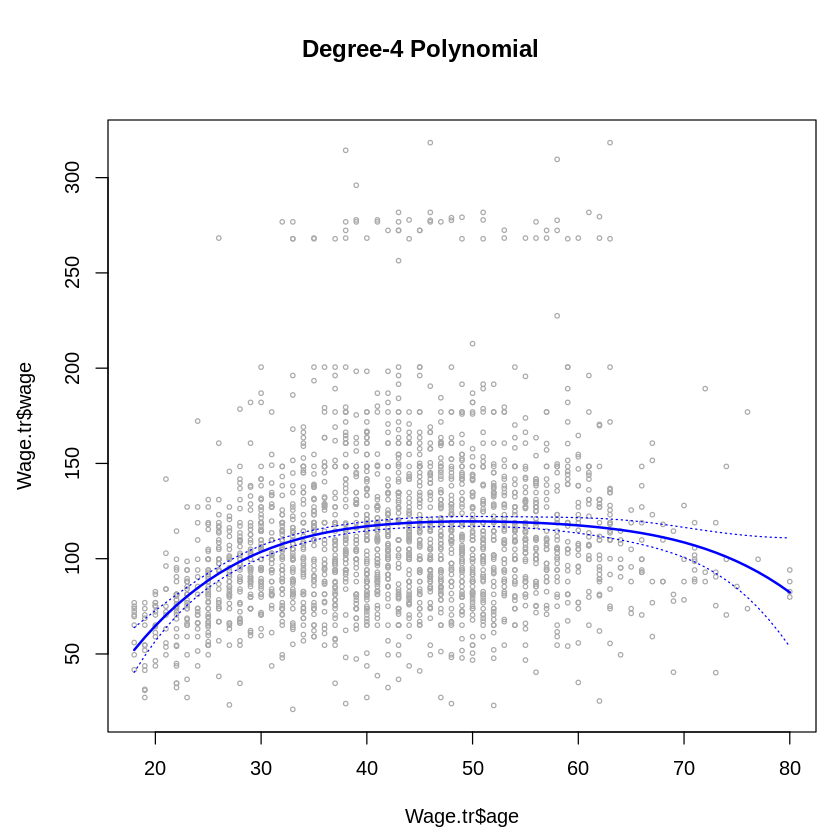

In [18]:
## plot
par(mfrow = c(1, 1), mar = c(4.5, 4.5, 1, 1), oma = c(0, 0, 4, 0))
plot(Wage.tr$age, Wage.tr$wage, xlim = agelims, cex = 0.5, col="darkgrey")
title("Degree-4 Polynomial", outer = T)
lines(age.grid, preds$fit, lwd = 2, col = "blue")
matlines(age.grid, se.bands, lwd = 1, col = "blue", lty = 3)

In [19]:
## Wage data 일반화 가법모형 ##
gam.m = gam(wage ~ s(age, 5), data = Wage.tr)

In [20]:
## predict
agelims = range(Wage.tr$age)
age.grid = seq(from = agelims[1], to = agelims[2])
preds.gam = predict(gam.m, newdata = list(age = age.grid))
summary(gam.m)


Call: gam(formula = wage ~ s(age, 5), data = Wage.tr)
Deviance Residuals:
   Min     1Q Median     3Q    Max 
-95.12 -24.09  -5.36  15.57 201.48 

(Dispersion Parameter for gaussian family taken to be 1575.155)

    Null Deviance: 3888248 on 2250 degrees of freedom
Residual Deviance: 3536222 on 2245 degrees of freedom
AIC: 22968.16 

Number of Local Scoring Iterations: NA 

Anova for Parametric Effects
            Df  Sum Sq Mean Sq F value    Pr(>F)    
s(age, 5)    1  155408  155408  98.662 < 2.2e-16 ***
Residuals 2245 3536222    1575                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Anova for Nonparametric Effects
            Npar Df Npar F     Pr(F)    
(Intercept)                             
s(age, 5)         4 31.205 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

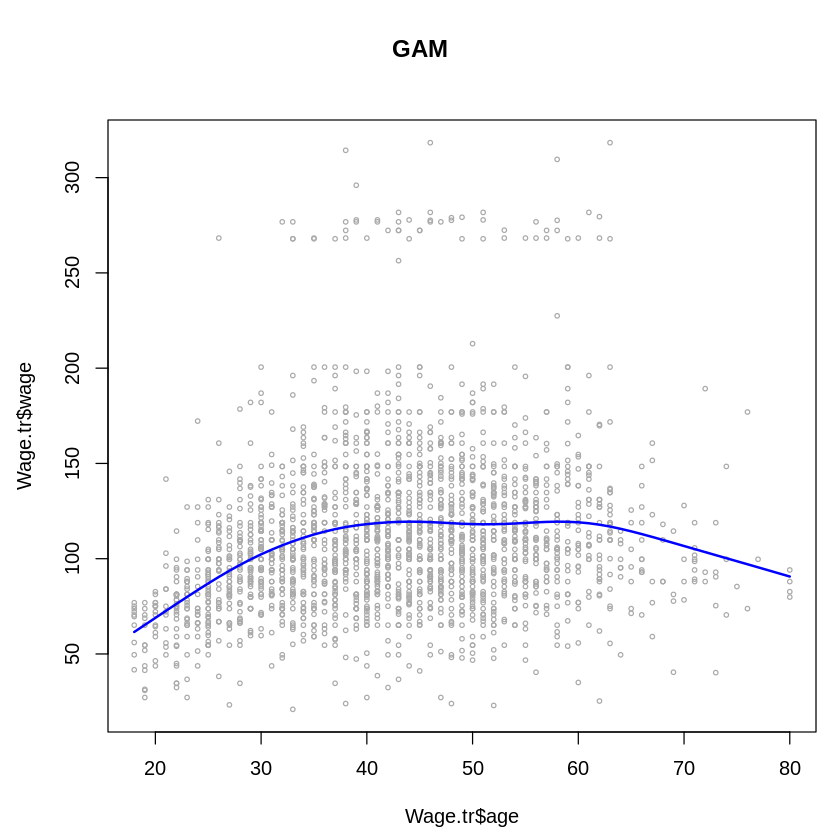

In [21]:
## plot
par(mfrow = c(1, 1), mar = c(4.5, 4.5, 1, 1), oma = c(0, 0, 4, 0))
plot(Wage.tr$age, Wage.tr$wage, xlim = agelims, cex = 0.5, col="darkgrey")
title("GAM", outer = T)
lines(age.grid, preds.gam, lwd = 2, col = "blue")

In [22]:
## validation
install.packages("forecast")
library(forecast)
preds.poly = predict(fit11, newdata = Wage.val)
preds.gam = predict(gam.m, newdata = Wage.val)
accuracy(preds.poly, Wage.val$y)  # poly
accuracy(preds.gam, Wage.val$y)   # gam

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



,ME,RMSE,MAE,MPE,MAPE
Test set,1894.136,1894.174,1894.136,94.43409,94.43409


,ME,RMSE,MAE,MPE,MAPE
Test set,1894.164,1894.203,1894.164,94.43548,94.43548


## 로지스틱 회귀분석

In [23]:
## data
x = round(runif(500, -3, 3), 3)
exp_B = exp(0.3 - 2 * x - 0.1 * x^2 + x^3)
p = exp_B / (1 + exp_B)
y = rbinom(500, 1, prob = p)
y = as.factor(y)
data = data.frame(x, y)

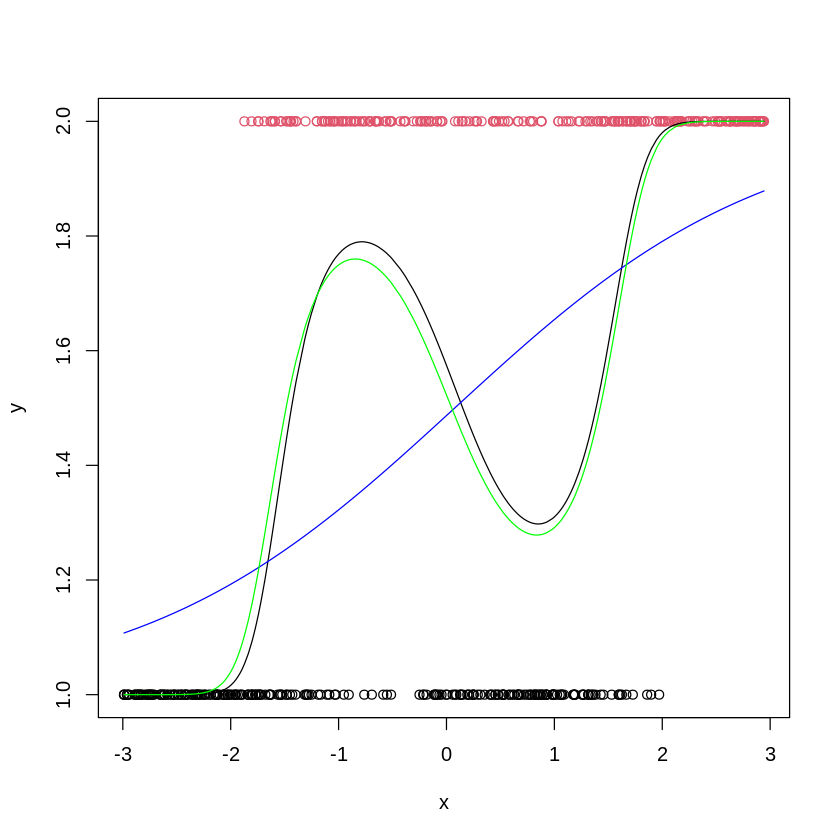

In [24]:
## plot
plot(x, y, col = y)
true = data.frame(x, p)
true = true[order(x), ]
lines(true$x, true$p+1, col = y)

## 단순 logistic
glm.m = glm(y ~ x, family = binomial, data)
pred = predict(glm.m, data, type = "response")
preds = data.frame(x, pred)
preds = preds[order(x), ]
lines(preds$x, preds$pred + 1, col = "blue")

## 다항 logistic
glm.m = glm(y ~ poly(x, 3), family = binomial, data)
pred = predict(glm.m, data, type = "response")
preds = data.frame(x, pred)
preds = preds[order(x), ]
lines(preds$x, preds$pred + 1, col = "green")